In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from datetime import timedelta
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/train.csv', delimiter = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
#Check Data ranges for the numerical columns 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


Data Distribution Observations

In [10]:
#Single people have highest chance of subscribing
df.groupby(['marital'], as_index=False)['y'].mean()

,marital,y
0,divorced,0.119455
1,married,0.101235
2,single,0.149492


In [11]:
#Higher chance of people without a mortgage subscribing to a term deposit
df.groupby(['housing'], as_index=False)['y'].mean()

,housing,y
0,no,0.167024
1,yes,0.077000


In [12]:
#People with laosn see similar results
df.groupby(['loan'], as_index=False)['y'].mean()

,loan,y
0,no,0.126557
1,yes,0.066814


In [13]:
#Those who are retired or a student will have the highest chance of subscribing to a term deposit -- C
df.groupby(['job'], as_index=False)['y'].mean()

,job,y
0,admin.,0.122027
1,blue-collar,0.072750
2,entrepreneur,0.082717
3,housemaid,0.087903
4,management,0.137556
5,retired,0.227915
6,self-employed,0.118429
7,services,0.088830
8,student,0.286780
9,technician,0.110570


In [14]:
#When point of contact was used, led to higher chance of the user subscribing 
df.groupby(['contact'], as_index=False)['y'].mean()

,contact,y
0,cellular,0.149189
1,telephone,0.134205
2,unknown,0.040707


In [15]:
#People who got their undergrad or post grad have the highest chance of subscribing to a term deposit
df.groupby(['education'], as_index=False)['y'].mean()

,education,y
0,primary,0.086265
1,secondary,0.105594
2,tertiary,0.150064
3,unknown,0.135703


In [16]:
#Highest months were march, october, september, december
df.groupby(['month'], as_index=False)['y'].mean()

,month,y
0,apr,0.196794
1,aug,0.110133
2,dec,0.467290
3,feb,0.166478
4,jan,0.101212
5,jul,0.090935
6,jun,0.102228
7,mar,0.519916
8,may,0.067195
9,nov,0.101511


In [17]:
#First and the 9th of the month saw the highest percentage chance to subscribe
df.groupby(['day'], as_index=False)['y'].mean()

,day,y
0,1,0.279503
1,2,0.140758
2,3,0.164968
3,4,0.159170
4,5,0.112565
5,6,0.093685
6,7,0.086406
7,8,0.109121
8,9,0.114670
9,10,0.230916


In [18]:
df['age_cut'] = pd.qcut(df['age'], 6)

In [19]:
#Individuals aged 52+ and under 31 were most likely to subscribe to a term deposit
df.groupby(['age_cut'], as_index=False)['y'].mean()

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_70180/1308152034.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_cut'], as_index=False)['y'].mean()


,age_cut,y
0,"(17.999, 31.0]",0.149679
1,"(31.0, 35.0]",0.106332
2,"(35.0, 39.0]",0.101007
3,"(39.0, 45.0]",0.087691
4,"(45.0, 52.0]",0.092045
5,"(52.0, 95.0]",0.155373


In [20]:
#Success of the marketing campaign only accounts for 65% of users that will subscribe
df.groupby(['poutcome'], as_index=False)['y'].mean()

,poutcome,y
0,failure,0.126097
1,other,0.166848
2,success,0.647253
3,unknown,0.091615


<Axes: xlabel='y', ylabel='Count'>

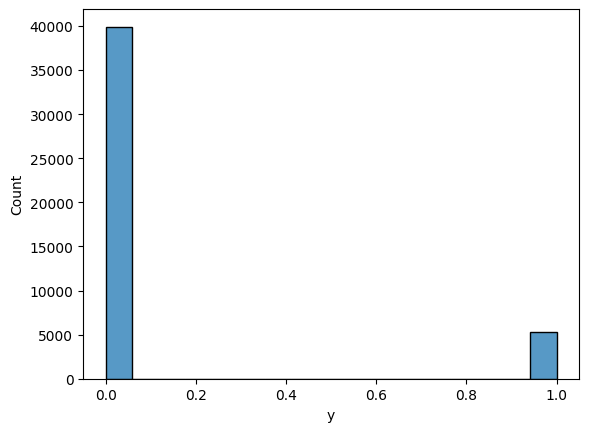

In [21]:
sns.histplot(x=df['y'])

<Axes: ylabel='age'>

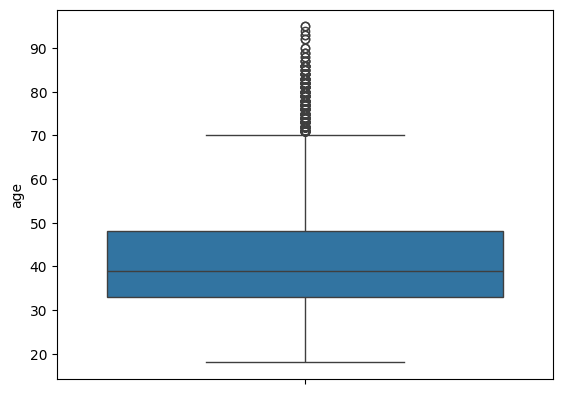

In [22]:
sns.boxplot(df['age'])

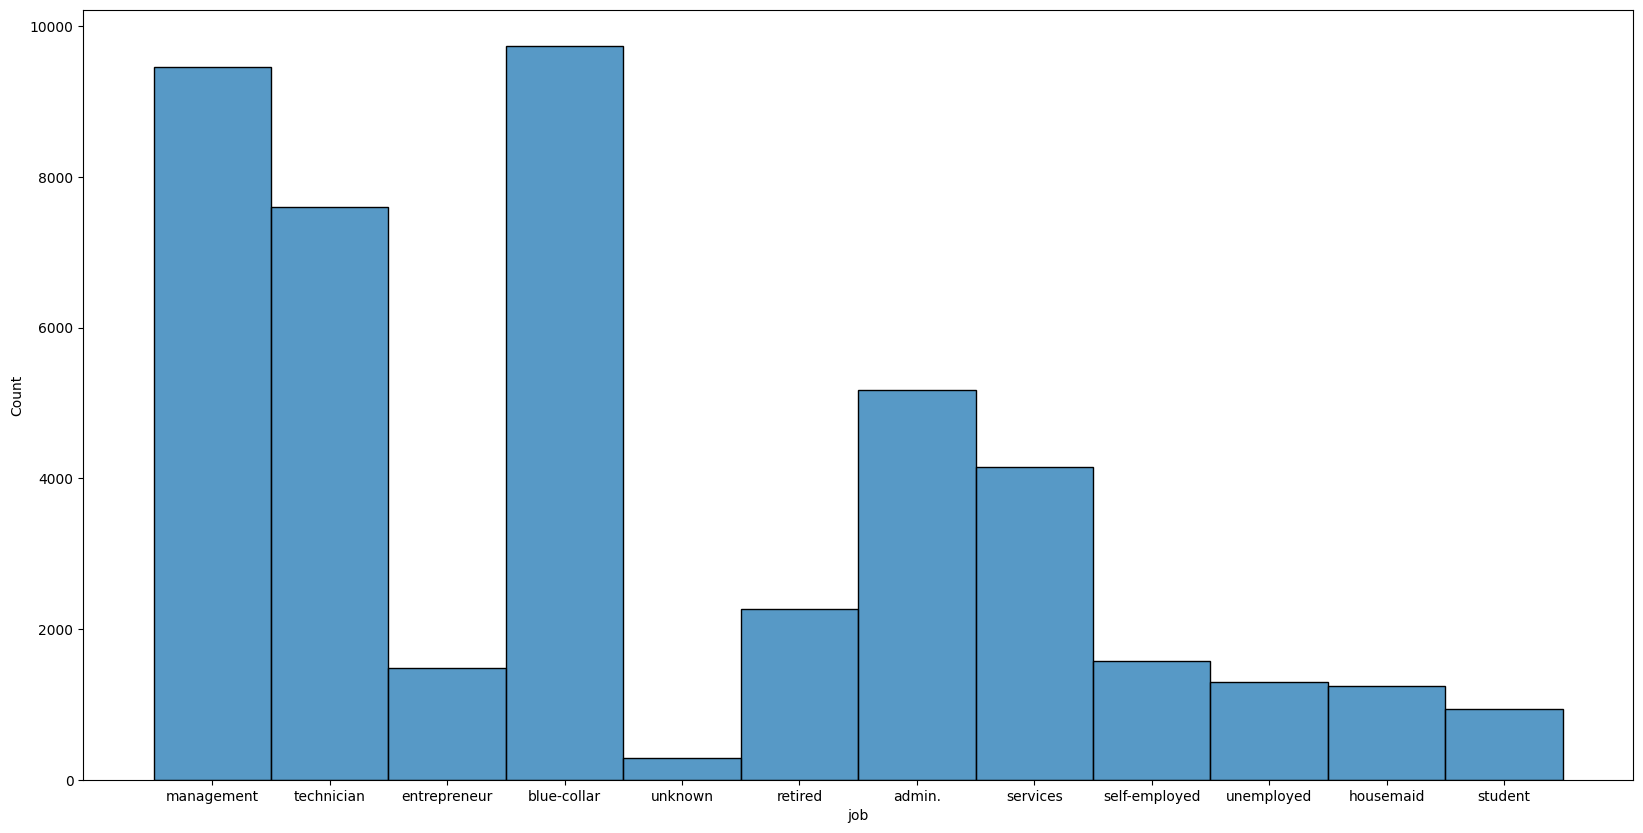

In [23]:
plt.figure(figsize=(20,10))
sns.histplot(x=df['job'])
plt.show()

<Axes: xlabel='marital', ylabel='Count'>

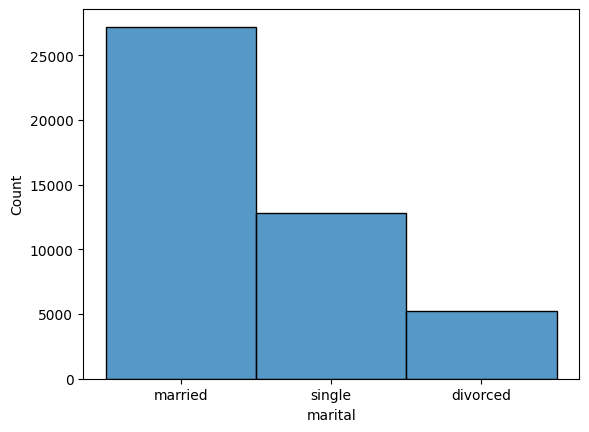

In [24]:
sns.histplot(x=df['marital'])

<Axes: xlabel='education', ylabel='Count'>

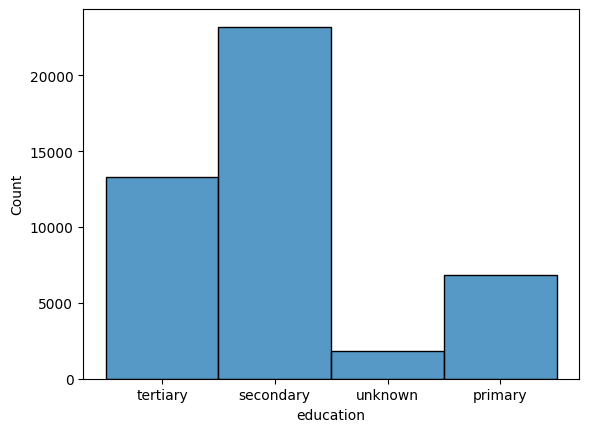

In [25]:
sns.histplot(x=df['education'])

In [26]:
df['education'].value_counts().reset_index()

,education,count
0,secondary,23202
1,tertiary,13301
2,primary,6851
3,unknown,1857


<Axes: xlabel='balance', ylabel='Count'>

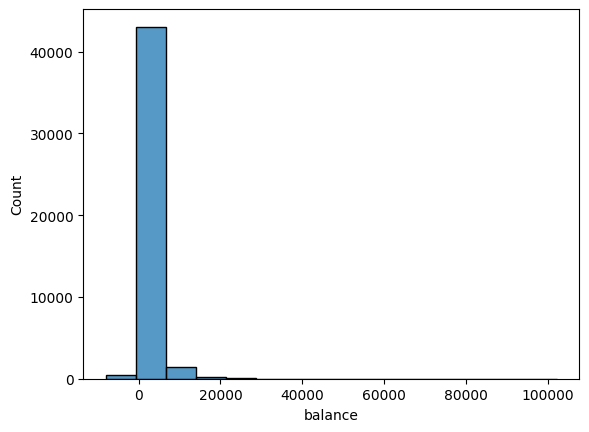

In [27]:
sns.histplot(x=df['balance'], bins=15)

In [28]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<Axes: xlabel='housing', ylabel='Count'>

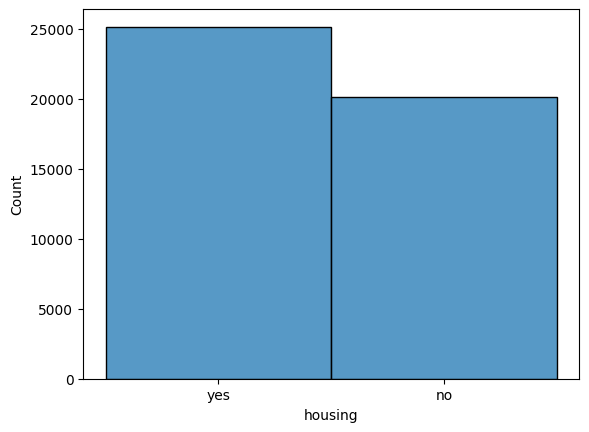

In [29]:
#Distribution for if they bought a mortgage or not

sns.histplot(df['housing'])

<Axes: xlabel='loan', ylabel='Count'>

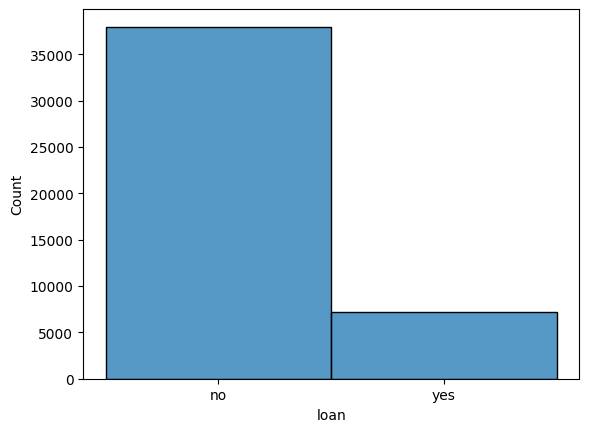

In [30]:
sns.histplot(df['loan'])

<Axes: xlabel='contact', ylabel='Count'>

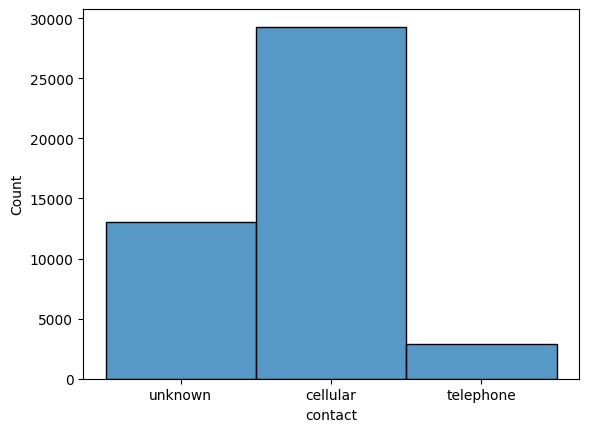

In [31]:
sns.histplot(df['contact'])

<Axes: xlabel='day', ylabel='Count'>

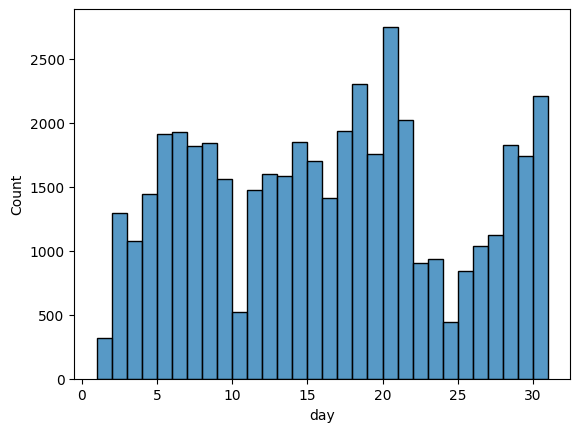

In [32]:
#majority of the distribution were contacted on the 21st of each month

sns.histplot(df['day'],bins=30)

<Axes: xlabel='month', ylabel='Count'>

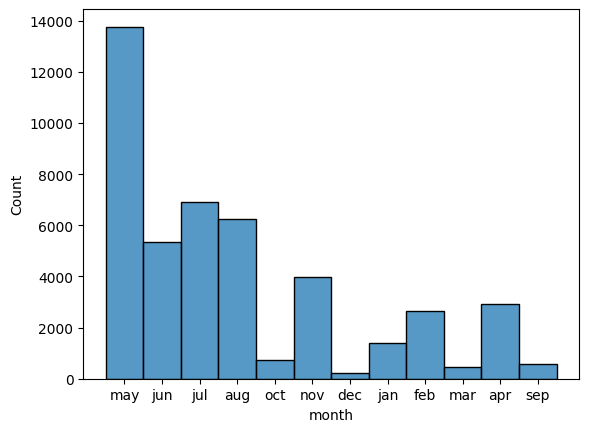

In [33]:
#Majority of the sample were contacted in May and began to fall off significantly throughout the distribution
sns.histplot(df['month'])

<Axes: xlabel='duration', ylabel='Count'>

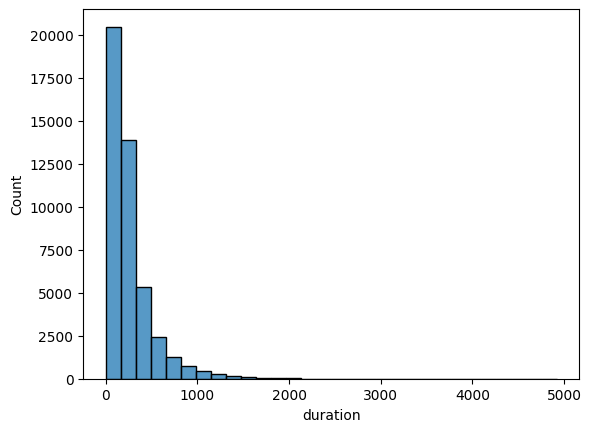

In [34]:
sns.histplot(df['duration'], bins=30)

In [35]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [36]:
df['duration']

0         261
1         151
2          76
3          92
4         198
         ... 
45206     977
45207     456
45208    1127
45209     508
45210     361
Name: duration, Length: 45211, dtype: int64

<Axes: xlabel='campaign', ylabel='Count'>

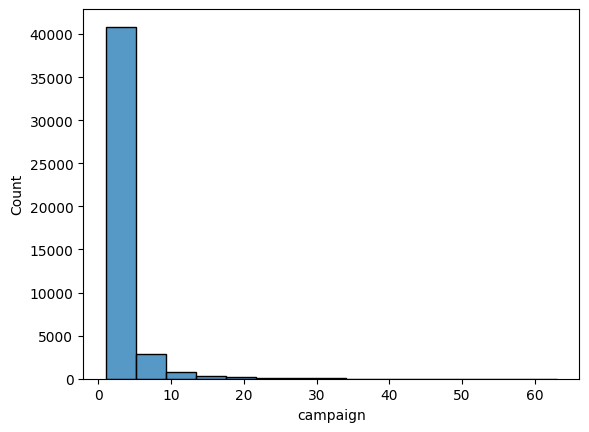

In [37]:
sns.histplot(x=df['campaign'], bins=15)

<Axes: xlabel='pdays', ylabel='Count'>

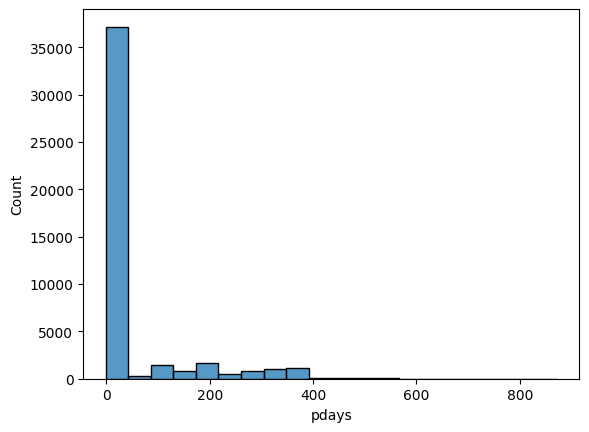

In [38]:
sns.histplot(df['pdays'], bins=20)

In [39]:
#Interesting variable for those who subscribed a term deposit - will look into this
df['pdays'].value_counts().reset_index()

,pdays,count
0,-1,36954
1,182,167
2,92,147
3,91,126
4,183,126
...,...,...
554,449,1
555,452,1
556,648,1
557,595,1


In [40]:
# Too many unknown observations, need to find an explanation how to interpret them. Success can be assumed to be those who
# subscribed a term deposit... "Other" category can be determined as a "maybe" for those responding from the campaign they were
# exposed to.
df['poutcome'].value_counts().reset_index()

,poutcome,count
0,unknown,36959
1,failure,4901
2,other,1840
3,success,1511


In [41]:
df['y'].value_counts().reset_index()

,y,count
0,0,39922
1,1,5289


In [42]:
#Isolate the outcome variable
sub_df = df[df['y'] == 1]
sub_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1,"(52.0, 95.0]"
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1,"(52.0, 95.0]"
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1,"(39.0, 45.0]"
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1,"(52.0, 95.0]"
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1,"(52.0, 95.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1,"(52.0, 95.0]"
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,1,"(17.999, 31.0]"
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,"(45.0, 52.0]"
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,"(52.0, 95.0]"


In [43]:
notsubbed = df[df['y'] == 0]
notsubbed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,"(52.0, 95.0]"
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,"(39.0, 45.0]"
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,"(31.0, 35.0]"
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,"(45.0, 52.0]"
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,"(31.0, 35.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,0,"(52.0, 95.0]"
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,0,"(35.0, 39.0]"
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0,"(31.0, 35.0]"
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,"(52.0, 95.0]"


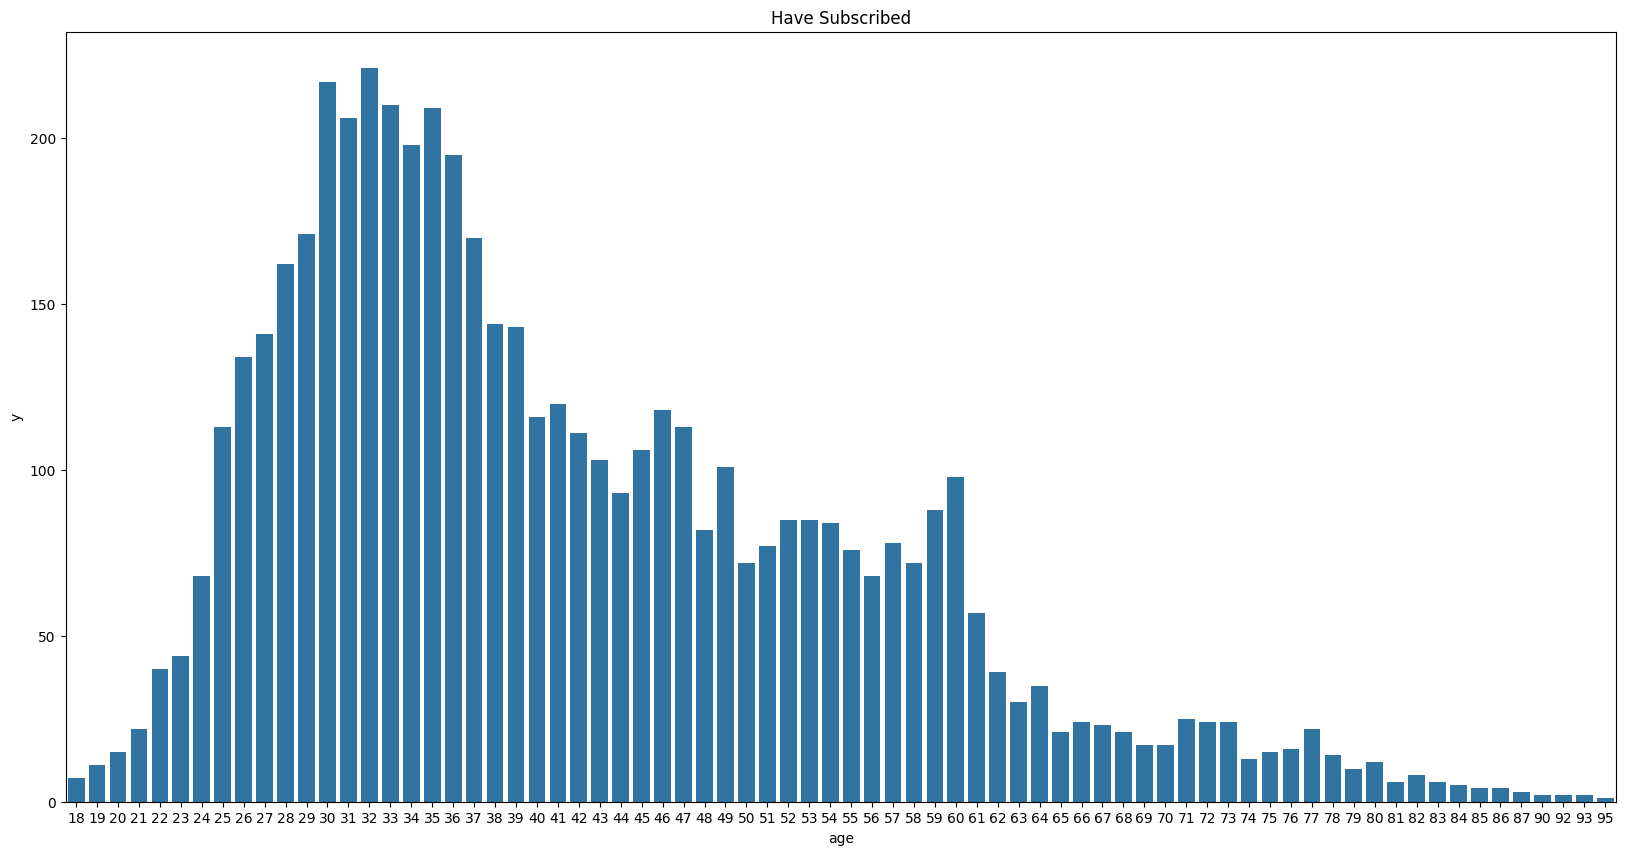

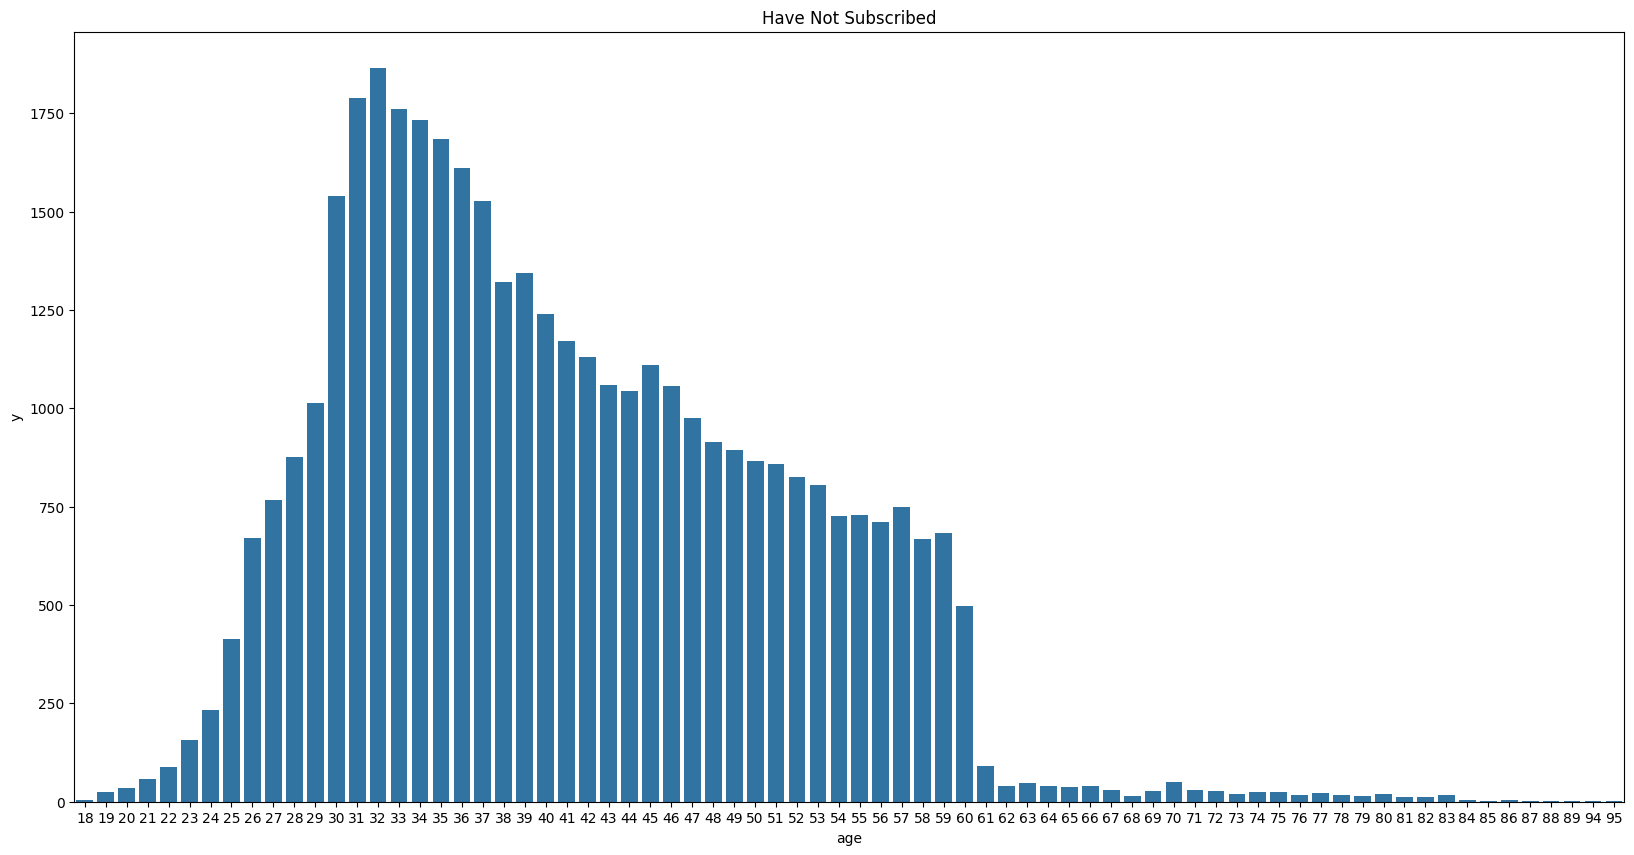

In [44]:
sub_age = sub_df.groupby('age')

# generate bar plot for how many customers have churned per age
# Note: Using count instead of sum would be incorrect, count will just return the number of people at that age
# Assuming has churned is represented as 1, then the sum of the churn column represents how many customers have churned at that age
plt.figure(figsize=(20,10))
sns.barplot(x=sub_age['y'].sum().index, y=sub_age['y'].sum())
plt.title("Have Subscribed")
plt.show()


# check for people who have not churned
notsubbed_Age = notsubbed.groupby('age')
# using count here since sum of all who have not churned would be 0
plt.figure(figsize=(20,10))
sns.barplot(x=notsubbed_Age['y'].count().index, y=notsubbed_Age['y'].count())
plt.title("Have Not Subscribed")
plt.show()

<Axes: xlabel='y', ylabel='pdays'>

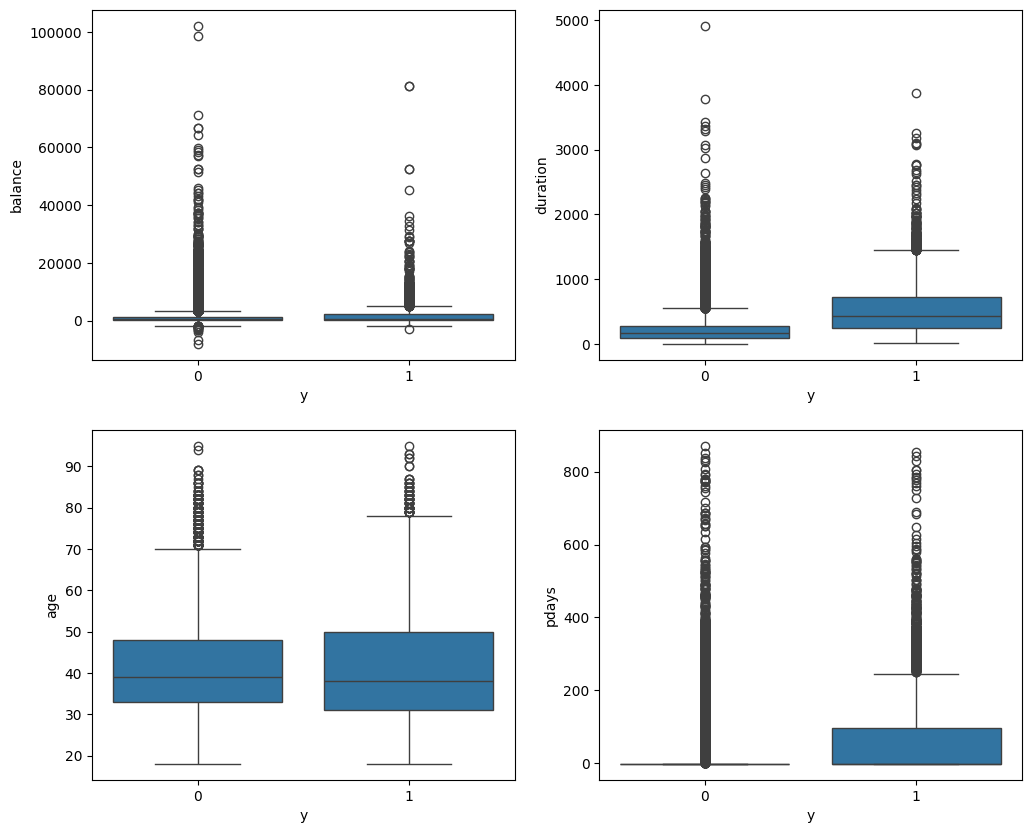

In [45]:
#More plots for the users that have subscribed - comparison using boxplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,10))
sns.boxplot(x='y', y='balance', data=df, ax=ax1)
sns.boxplot(x='y', y='duration', data=df, ax=ax2)
sns.boxplot(x='y', y='age', data=df, ax=ax3)
sns.boxplot(x='y', y='pdays', data=df, ax=ax4)

<Axes: xlabel='age', ylabel='balance'>

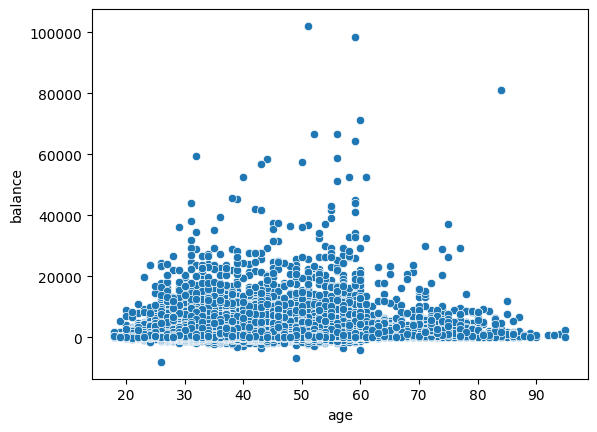

In [46]:
sns.scatterplot(x=df['age'], y=df['balance'])

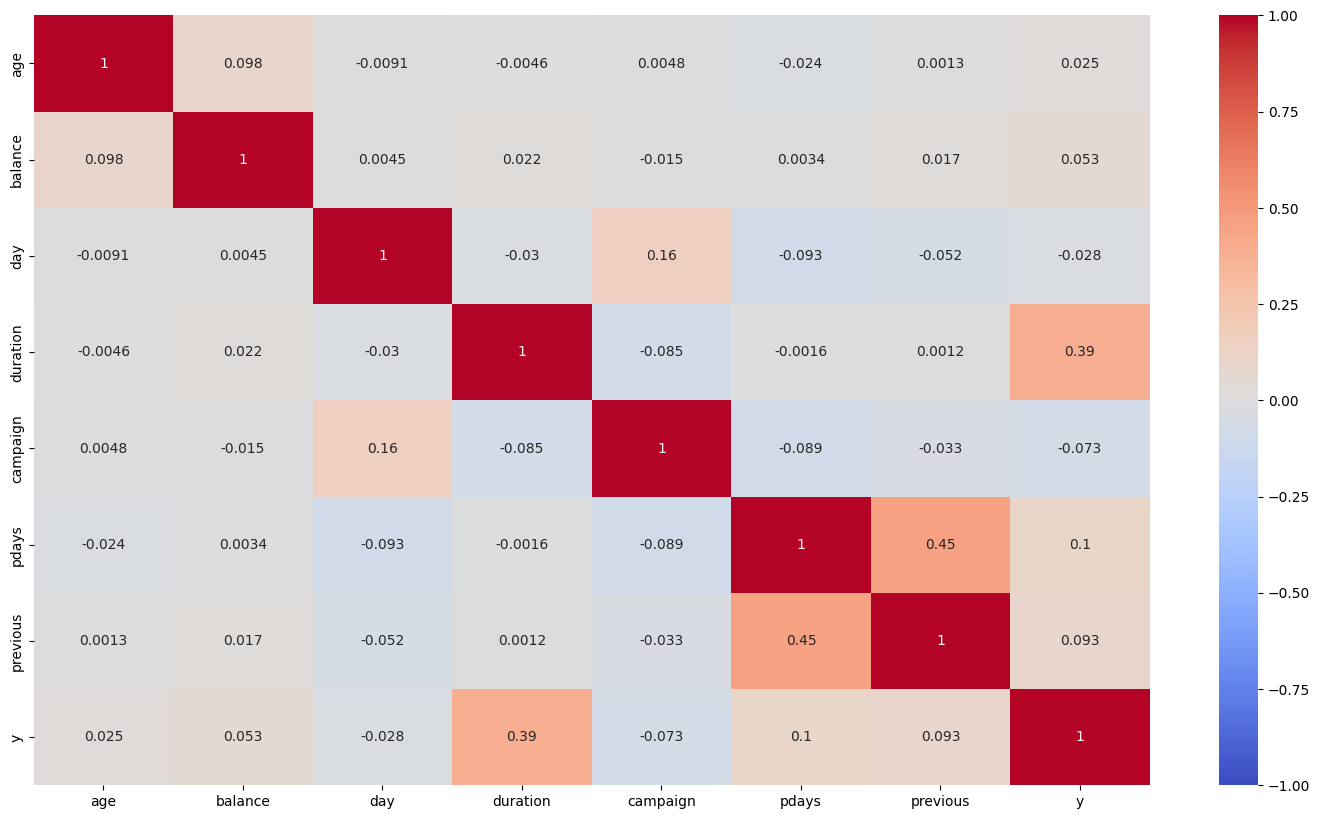

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_70180/2454456081.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_corr.values, y=sub_corr.index, palette='viridis')


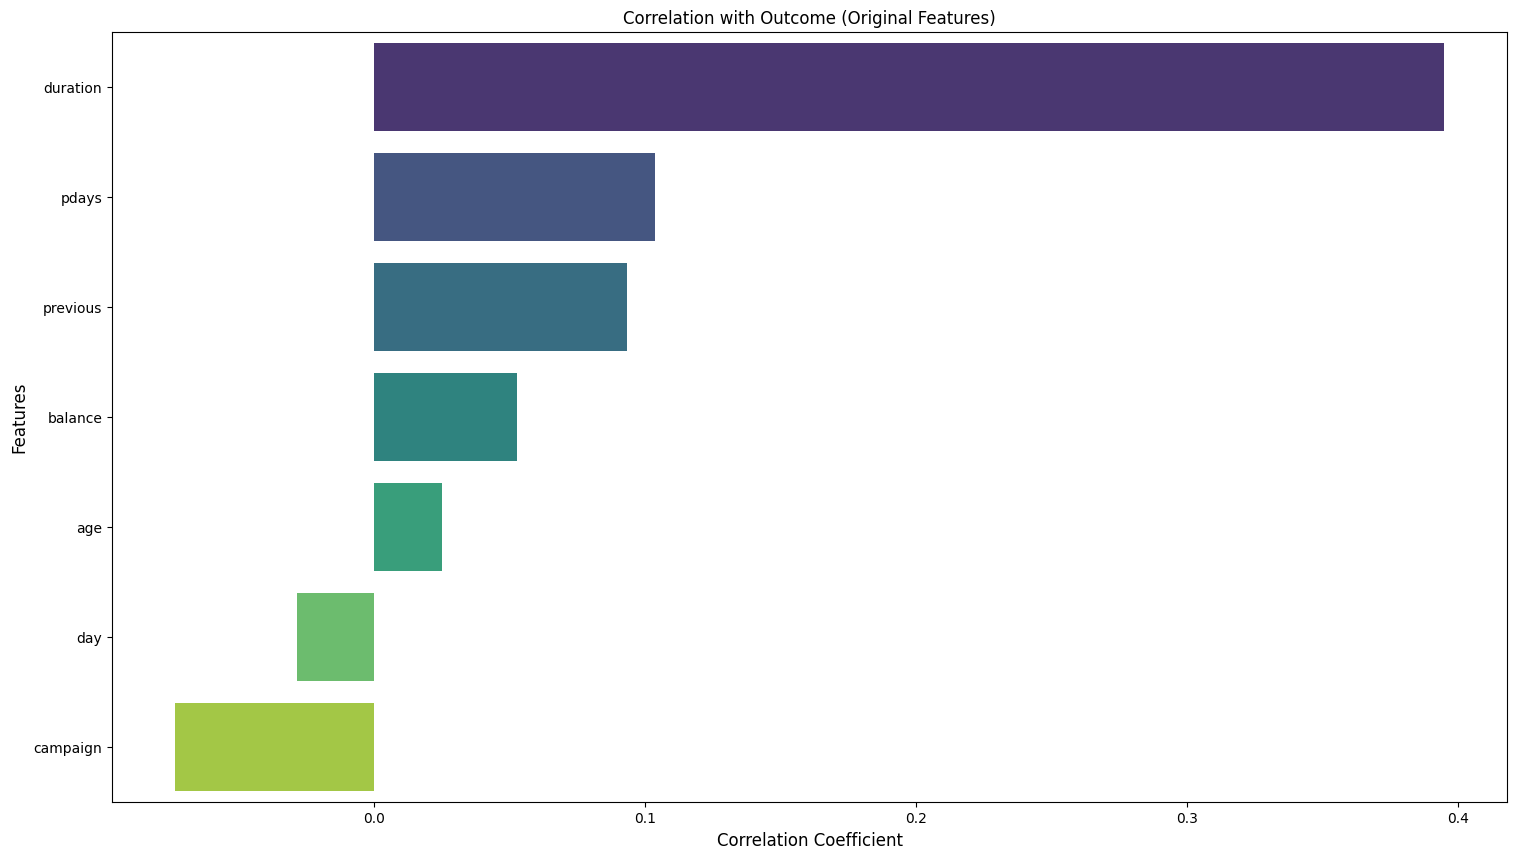

In [47]:
#Correlation and heatmap matrix

corr_matrix = df.corr(numeric_only=True)
sub_corr = corr_matrix['y'].drop('y').sort_values(ascending=False)

#Heatmap
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

#Correlation Matrix
plt.figure(figsize=(18,10))
sns.barplot(x=sub_corr.values, y=sub_corr.index, palette='viridis')
plt.title('Correlation with Outcome (Original Features)')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()



Duration seems to have the highest correlation with the outcome variable with pdays, previous
and balance having the next largest positive correlation.

Balance and pdays could be less of a factor once outliers have been dealt with.

Campaign has the largest negative correlation with the outcome variable

In [48]:
#Correlation and heamap included with the categorical or binary variables

labelecoder = LabelEncoder()

enc_df = df.copy()

encoding_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for col in encoding_col:
    enc_df[col] = labelecoder.fit_transform(enc_df[col])

enc_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0,"(52.0, 95.0]"
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0,"(39.0, 45.0]"
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0,"(31.0, 35.0]"
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0,"(45.0, 52.0]"
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0,"(31.0, 35.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,1,"(45.0, 52.0]"
45207,71,5,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,1,"(52.0, 95.0]"
45208,72,5,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,1,"(52.0, 95.0]"
45209,57,1,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,0,"(52.0, 95.0]"


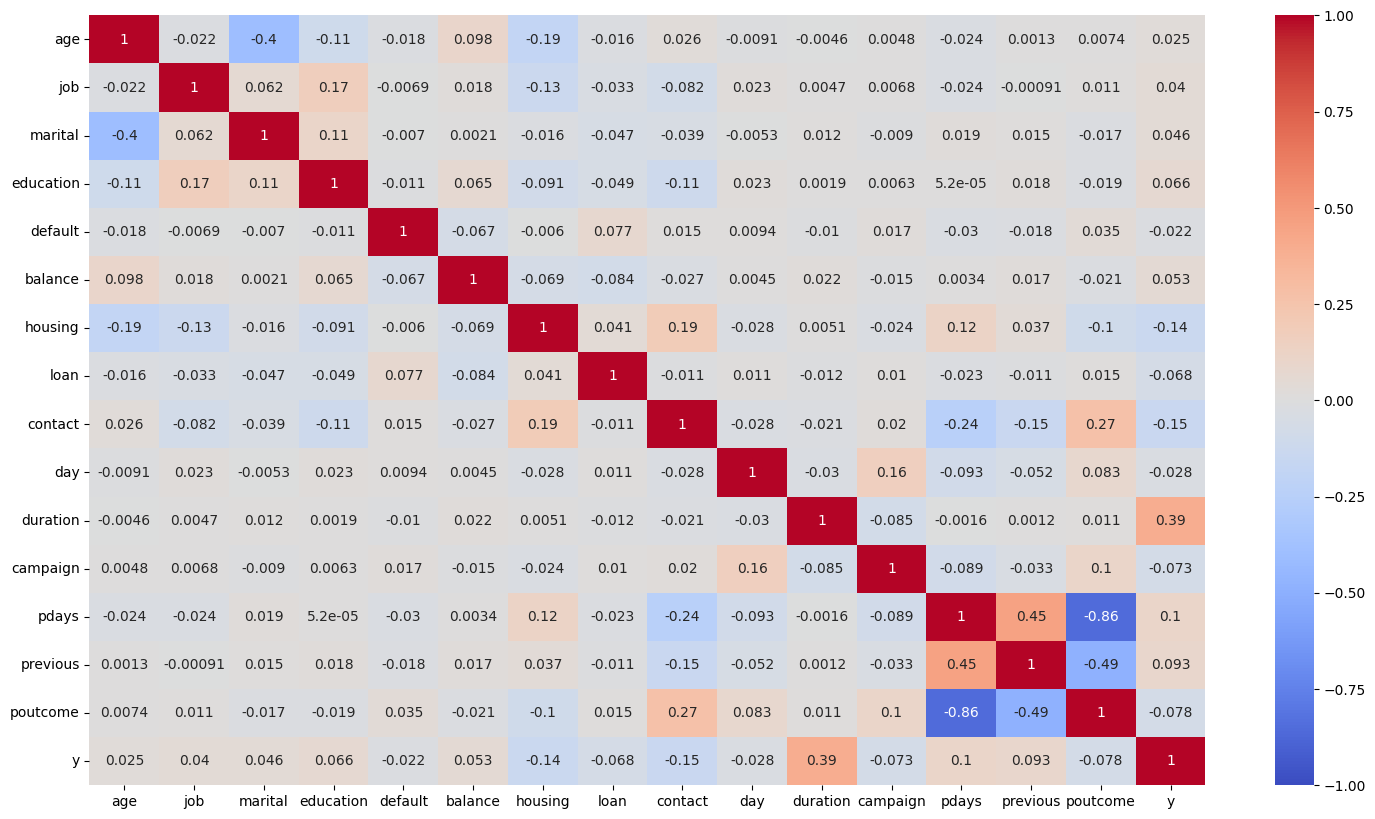

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_70180/502674068.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_corr.values, y=sub_corr.index, palette='viridis')


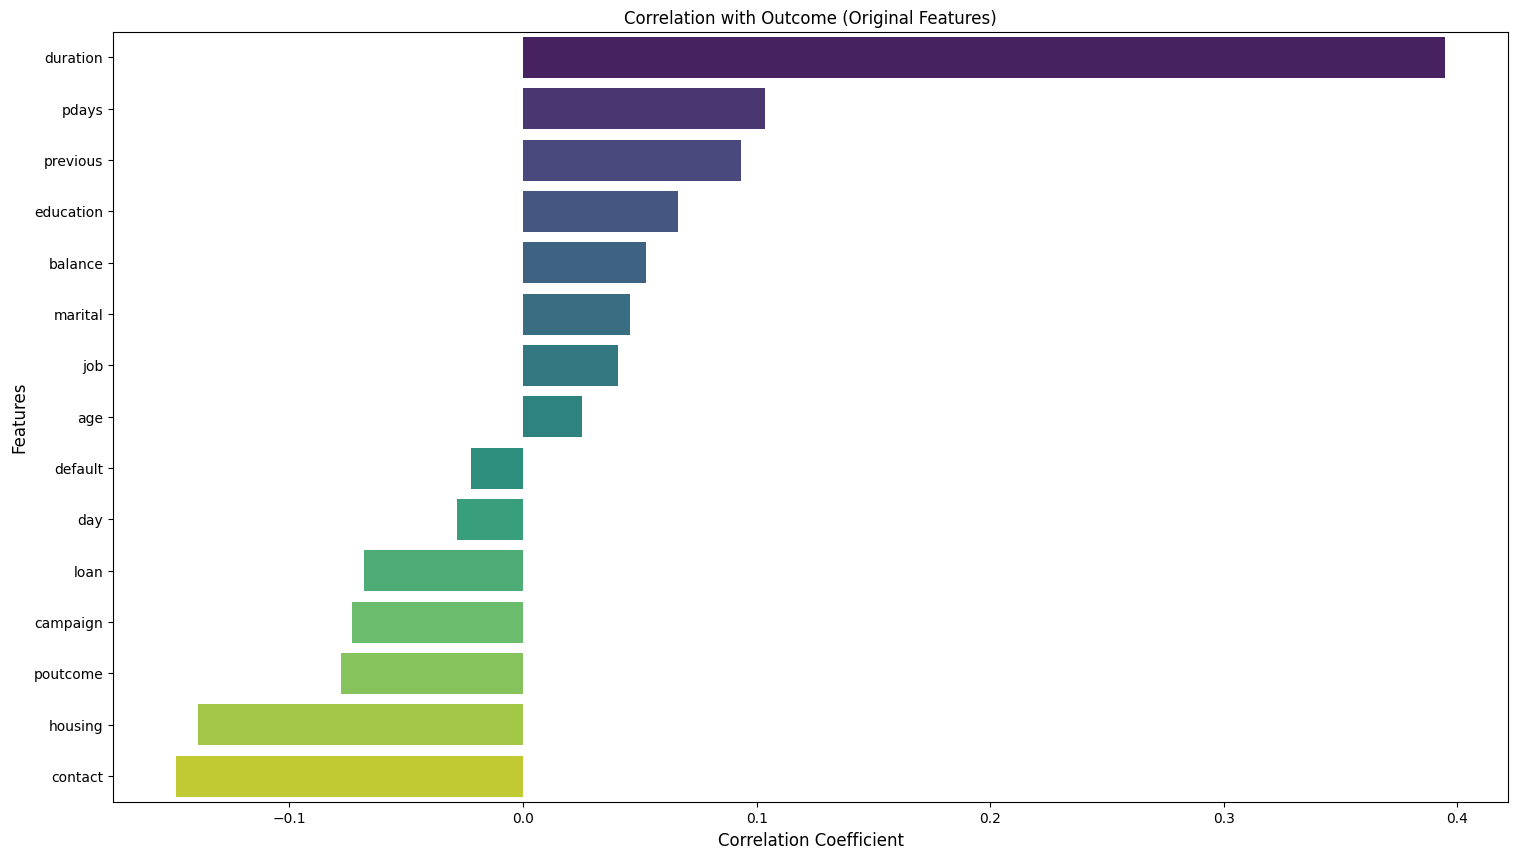

In [49]:
# Correlation matrix

corr_matrix = enc_df.corr(numeric_only=True)
sub_corr = corr_matrix['y'].drop('y').sort_values(ascending=False)

#Heatmap
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

#Correlation Matrix
plt.figure(figsize=(18,10))
sns.barplot(x=sub_corr.values, y=sub_corr.index, palette='viridis')
plt.title('Correlation with Outcome (Original Features)')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

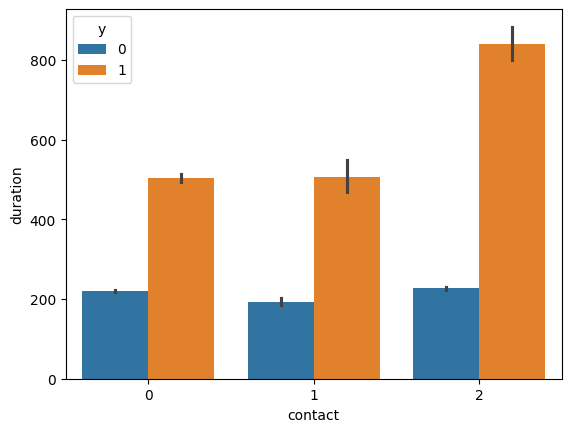

In [50]:
#Going to further explore the duration, contact, and housing variables

sns.barplot(x='contact', y='duration', hue='y', data=enc_df)
plt.show()

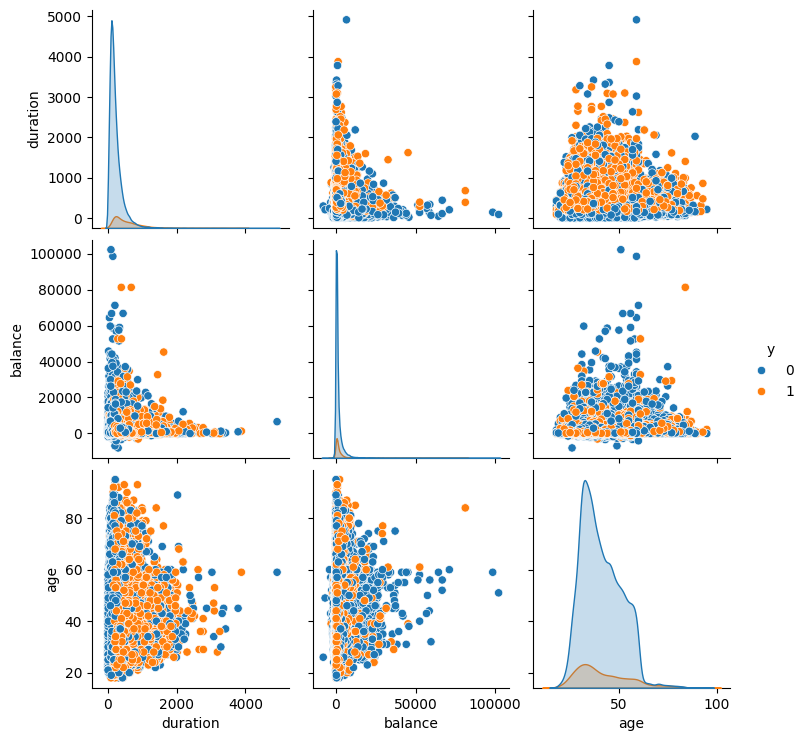

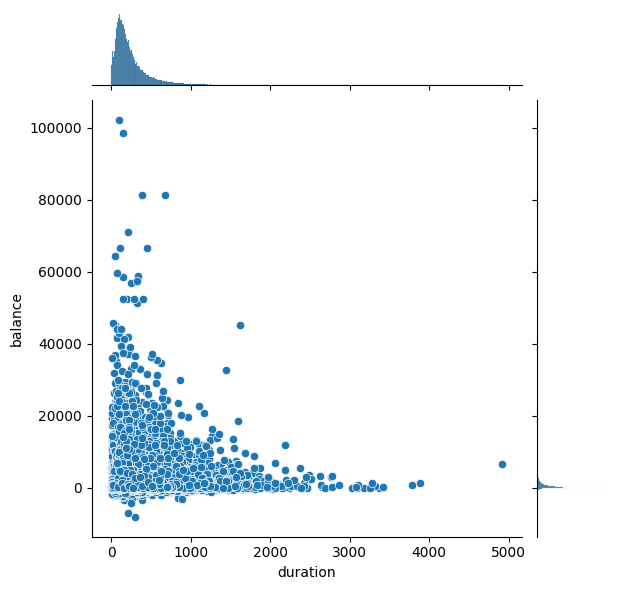

In [51]:
sns.pairplot(df[['duration', 'balance', 'age', 'y']], hue='y')
sns.jointplot(x='duration', y='balance', data=df, kind='scatter')

It seems theres a difference in comparison for those who purchase bank term deposits, they all have on average larger durations than those who did not subscribe to a term deposit

In [52]:
enc_df['contact'].value_counts().reset_index()

,contact,count
0,0,29285
1,2,13020
2,1,2906


## Feature Engineering

One hot encoding with all the binary columns
Converting the Day and Month column to its own datetime feature
Convert the continuous variable of "Balance" into a categorical variable

In [53]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,"(52.0, 95.0]"
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,"(39.0, 45.0]"
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,"(31.0, 35.0]"
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,"(45.0, 52.0]"
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,"(31.0, 35.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,"(45.0, 52.0]"
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,"(52.0, 95.0]"
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,"(52.0, 95.0]"
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,"(52.0, 95.0]"


In [54]:
#Converting to Date/Time Function

year = 2008

years = []

# Loop through each row of the DataFrame -- Understand how this works
for index, row in df.iterrows():
    # If the month is 'dec', assign the current year and then increment for the next rows
    if row['month'] == 'dec' and index > 0 and df.iloc[index - 1]['month'] != 'dec':
        years.append(year)
        year += 1
    else:
        years.append(year)

df['year'] = years

df['date'] = pd.to_datetime(df['day'].astype(str) + '-' + df['month'] + '-' + df['year'].astype(str), format='%d-%b-%Y') 
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut,year,date
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,"(52.0, 95.0]",2008,2008-05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,"(39.0, 45.0]",2008,2008-05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,"(31.0, 35.0]",2008,2008-05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,"(45.0, 52.0]",2008,2008-05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,"(31.0, 35.0]",2008,2008-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,"(45.0, 52.0]",2010,2010-11-17
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,"(52.0, 95.0]",2010,2010-11-17
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,"(52.0, 95.0]",2010,2010-11-17
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,"(52.0, 95.0]",2010,2010-11-17


In [55]:
# 2010 had the highest percentage of a user subscribing to a term deposit. Research into the success rate during the year 2010
df.groupby(['year'], as_index=False)['y'].mean()

,year,y
0,2008,0.050511
1,2009,0.166212
2,2010,0.514184


In [56]:
# Filter the dataset for the year 2010
df_2008 = df[df['year'] == 2008]
df_2009 = df[df['year'] == 2009]
df_2010 = df[df['year'] == 2010]

# Group by 'poutcome' and calculate the success rate for 2010
success_rate_2008 = df_2008.groupby('poutcome').size() / len(df_2008)
success_rate_2009 = df_2009.groupby('poutcome').size() / len(df_2009)
success_rate_2010 = df_2010.groupby('poutcome').size() / len(df_2010)

print(success_rate_2008)
print(success_rate_2009)
print(success_rate_2010)


poutcome
failure    0.025075
other      0.006602
success    0.001515
unknown    0.966807
dtype: float64
poutcome
failure    0.240425
other      0.088728
success    0.045318
unknown    0.625528
dtype: float64
poutcome
failure    0.240426
other      0.125887
success    0.285106
unknown    0.348582
dtype: float64


In [57]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [58]:
#Converting balance to categorical (High, Medium, Low) - ** More optimization, remove the outliers and find out the more accurate quantiles

def money_class(x):
    if x >= 1500:
        return 'High'
    elif x < 1499 & x >= 750:
        return 'Medium'
    else:
        return 'Low'


df['m_class'] = df['balance'].apply(money_class)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age_cut,year,date,m_class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,0,"(52.0, 95.0]",2008,2008-05-05,High
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,0,"(39.0, 45.0]",2008,2008-05-05,Low
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,0,"(31.0, 35.0]",2008,2008-05-05,Low
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,0,"(45.0, 52.0]",2008,2008-05-05,High
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,0,"(31.0, 35.0]",2008,2008-05-05,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,977,3,-1,0,unknown,1,"(45.0, 52.0]",2010,2010-11-17,Low
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,456,2,-1,0,unknown,1,"(52.0, 95.0]",2010,2010-11-17,High
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,1127,5,184,3,success,1,"(52.0, 95.0]",2010,2010-11-17,High
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,508,4,-1,0,unknown,0,"(52.0, 95.0]",2010,2010-11-17,Low


In [59]:
#Extra summary
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,m_class
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,3
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,Low
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,30669


In [60]:
def money_class_num(x):
    if x >= 1500:
        return '2'
    elif x < 1499 & x >= 750:
        return '1'
    else:
        return '0'

enc_df['money_level'] = df['balance'].apply(money_class_num)

In [61]:
enc_df['money_level'] = enc_df['money_level'].astype(int)
enc_df['money_level'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: money_level
Non-Null Count  Dtype
--------------  -----
45211 non-null  int64
dtypes: int64(1)
memory usage: 353.3 KB


In [62]:
enc_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut,money_level
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0,"(52.0, 95.0]",2
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0,"(39.0, 45.0]",0
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0,"(31.0, 35.0]",0
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0,"(45.0, 52.0]",2
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0,"(31.0, 35.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,1,"(45.0, 52.0]",0
45207,71,5,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,1,"(52.0, 95.0]",2
45208,72,5,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,1,"(52.0, 95.0]",2
45209,57,1,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,0,"(52.0, 95.0]",0


In [63]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

## Model Building

In [64]:
#Going to try to use regular df

categorical = ['job', 'housing', 'contact', 'marital', 'education', 'loan', 'default', 'poutcome']
numerical = ['duration', 'pdays', 'previous', 'age']
ordinal = ['money_level']

target = ['y']

X_train, X_test, y_train, y_test = train_test_split(enc_df[categorical + numerical + ordinal], df[target], test_size=0.3, random_state=42)

In [65]:
#Preprocessing pipeline

catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])
ordTransformer = Pipeline(steps = [('ord', OrdinalEncoder())])

preprocessor = ColumnTransformer(transformers = [('cat', catTransformer, categorical), ('num', numTransformer, numerical), ('ord', ordTransformer, ordinal)])
#('ord', ordTransformer, ordinal)

In [66]:
#Logistic regression Model - Basic

logreg = Pipeline(steps=[('preprocessor', preprocessor), ('logistic', LogisticRegression())])

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

Accuracy:  0.8992185196107343
Precision:  0.6546184738955824
Recall:  0.30600750938673343
F1:  0.4170575692963753


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results are quite low given the varibles fed into the model. Precision is lackluster leading to only a 60% amount of True positives the model is predicting. Recall is very low (31%) which signifies the model is predicting a high amount of false negatives. For the business this would be costly due to the model not being able to identify target users who would subscribe to the term deposit and therefore it would have a direct impact on revenue. In order for this model to be efficient, Recall should be prioritized and increased to minimize the volume of false negatives to capture as many subscribers at possible, even if its at a cost of allowing some false positives.

In [67]:
# Parameter tuning and grid search for Logistic Regression

param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2', 'elasticnet'],
    'logistic__solver': ['saga']  # saga solver supports l1, l2, and elasticnet
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

Best hyperparameters for Logistic Regression: {'logistic__C': 100, 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}


In [68]:
#Final pipeline for Logistic 

logreg = Pipeline(steps= [('preprocessor', preprocessor), ('logistic', LogisticRegression(C=100, penalty='l1', solver='saga'))])

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred)
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)


# cross validation
crossVal = cross_val_score(logreg, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_logreg_grid = classification_report(y_test, pred)
print(report_logreg_grid)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8995871424358596
Precision: 0.645679012345679
Recall Score: 0.32728410513141426
F1 Score: 0.43438538205980065


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

Cross Validation F1 Scores: [0.40733945 0.43727599 0.43715847 0.43462898 0.45551601 0.39776952
 0.4293578  0.44604317 0.44524237 0.45309735]
Mean cross validation F1 Score: 0.4343429089982166
              precision    recall  f1-score   support

           0       0.92      0.98      0.94     11966
           1       0.65      0.33      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564



In [69]:
#KNN model - Basic

knn = Pipeline(steps=[('preprocessor', preprocessor), ('knn', KNeighborsClassifier())])

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.8887496313771749
Precision:  0.5589403973509933
Recall:  0.2640801001251564
F1:  0.3586910327241819


In [70]:
#Parameter tuning and Grid Search for KNN

param_grid = {
    'knn__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighb

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['job',
                                                                          'housing',
                                                                          'contact',
                                                                          'marital',
                                                                          'education',
                                                                          'loan',
                                                                          'default',
                                                                          'poutcome']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['duration',
                                                                          'pdays',
                                                                          'previous',
                                                                          'age']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('ord',
                                                                                          OrdinalEncoder())]),
                                                                         ['money_level'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [71]:
# Output the best hyperparameter combination
print("Best hyperparameters for KNN:", grid_search.best_params_)

Best hyperparameters for KNN: {'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}


In [72]:
#Final Pipeline for KNN

knn = Pipeline(steps= (['preprocessor', preprocessor], ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='distance'))))

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

# cross validation
crossVal = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_knn_grid = classification_report(y_test, pred)
print(report_knn_grid)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.8796077853140667
Precision:  0.48205128205128206
Recall:  0.29411764705882354
F1:  0.3653322969296541


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighb

Cross Validation F1 Scores: [0.35643564 0.32358003 0.35130435 0.33846154 0.38602329 0.33622184
 0.34554974 0.38063439 0.33502538 0.34563758]
Mean cross validation F1 Score: 0.3498873789347187
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     11966
           1       0.48      0.29      0.37      1598

    accuracy                           0.88     13564
   macro avg       0.70      0.63      0.65     13564
weighted avg       0.86      0.88      0.87     13564



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [73]:
#Random Forest - Basic
rf = Pipeline(steps=[('preprocessor', preprocessor), ('rf', RandomForestClassifier())])

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy:  0.8945001474491301
Precision:  0.5779645191409897
Recall:  0.38735919899874843
F1:  0.4638441363806669


In [74]:
#Random Forest Final Pipeline
# Define hyperparameter grid
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(rf, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Random Forest:", grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

Best hyperparameters for Random Forest: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}


In [75]:
# AdaBoost - Basic
ada = Pipeline(steps=[('preprocessor', preprocessor), ('ada', AdaBoostClassifier())])

ada.fit(X_train, y_train)
pred = ada.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:  0.8971542317900324
Precision:  0.6030456852791878
Recall:  0.3717146433041302
F1:  0.45993031358885017


In [76]:
# Grid search for Adaboost model
param_grid = {
    'ada__n_estimators': [50, 100, 200],  # Number of estimators (weak learners)
    'ada__learning_rate': [0.01, 0.1, 1, 1.5],  # Learning rate controls the contribution of each weak learner
    'ada__algorithm': ['SAMME', 'SAMME.R']  # Different boosting algorithms
}

ada = Pipeline(steps=[('preprocessor', preprocessor), ('ada', AdaBoostClassifier())])
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding best score
print("Best Parameters: ", grid_search.best_params_)
print("Best F1 Score: ", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

Best Parameters:  {'ada__algorithm': 'SAMME.R', 'ada__learning_rate': 1.5, 'ada__n_estimators': 200}
Best F1 Score:  0.4729510800102969


In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming enc_df is your preprocessed DataFrame
# Replace 'base_estimator' with 'estimator'
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict using the test set
y_pred = bagging_clf.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     11966
           1       0.54      0.35      0.43      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.66      0.68     13564
weighted avg       0.87      0.89      0.88     13564



In [78]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees
    'max_samples': [0.5, 1.0],      # Fraction of samples to draw for each base estimator
    'max_features': [0.5, 1.0],     # Fraction of features to draw for each base estimator
    'bootstrap': [True, False],     # Whether samples are drawn with or without replacement
    'estimator__max_depth': [3, 5, 10]  # Max depth of the decision tree
}

# Create a Bagging Classifier with a Decision Tree base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(bagging_clf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ens

Best Hyperparameters: {'bootstrap': False, 'estimator__max_depth': 5, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 10}
Best Score: 0.9029292928536536
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.63      0.36      0.46      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging using KNN as the estimator (was not a good choice)

In [79]:
grid_search = GridSearchCV(bagging_clf, param_grid, cv=5, n_jobs=1, verbose=1)

In [80]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50],      # Number of trees (reduced for speed)
    'max_samples': [0.5, 1.0],     # Fraction of samples to draw
    'max_features': [0.5, 1.0],    # Fraction of features to draw
    'bootstrap': [True, False]     # Sampling with/without replacement
}

# Create a Bagging Classifier with KNeighborsClassifier as base estimator
bagging_clf = BaggingClassifier(estimator=KNeighborsClassifier(), random_state=42)

# Use GridSearchCV with single-threading (n_jobs=1)
grid_search = GridSearchCV(bagging_clf, param_grid, cv=5, n_jobs=1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ens

KeyboardInterrupt: 

Bagging with Random Forest as estimator

In [83]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define a reduced parameter grid
param_grid = {
    'n_estimators': [10, 20],  # Reduced number of trees
    'max_samples': [0.7, 1.0],  # Reduced number of max_samples
    'max_features': [0.7, 1.0],  # Reduced number of max_features
    'bootstrap': [True]  # Fixed to True, avoiding extra combination checks
}

# Create a Bagging Classifier with RandomForestClassifier as base estimator
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)

# Use GridSearchCV with reduced cross-validation folds (cv=3)
grid_search = GridSearchCV(bagging_clf, param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ens

Best Hyperparameters: {'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 20}
Best Score: 0.9016020475874491
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.63      0.38      0.47      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



Bagging with LogReg as estimator (using 10, 20 as estimators takes way too long - well over 7 minutes to run)

In [84]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20],      # Number of trees (reduced for speed)
    'max_samples': [0.7, 1.0],     # Fraction of samples to draw
    'max_features': [0.7, 1.0],    # Fraction of features to draw
    'bootstrap': [True, False]     # Sampling with/without replacement
}

# Create a Bagging Classifier with LogisticRegression as base estimator
bagging_clf = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(bagging_clf, param_grid, cv=5, n_jobs=1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the document

Best Hyperparameters: {'bootstrap': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10}
Best Score: 0.8921542626945801
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.60      0.21      0.31      1598

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bagging with SVC as estimator (set estimator to 10, 20 and it took 11+ minutes)


In [85]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20],      # Number of trees (reduced for speed)
    'max_samples': [0.7, 1.0],     # Fraction of samples to draw
    'max_features': [0.7, 1.0],    # Fraction of features to draw
    'bootstrap': [True, False]     # Sampling with/without replacement
}

# Create a Bagging Classifier with SVC as base estimator
bagging_clf = BaggingClassifier(estimator=SVC(), random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(bagging_clf, param_grid, cv=5, n_jobs=1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ens

KeyboardInterrupt: 

In [89]:
from IPython.display import Image

# Adjust the file path as necessary
Image('/https://github.com/mn42899/data_scienceii/blob/main/Screenshot%202024-09-22%20at%203.27.48%E2%80%AFPM.png')

FileNotFoundError: No such file or directory: '/https://github.com/mn42899/data_scienceii/blob/main/Screenshot%202024-09-22%20at%203.27.48%E2%80%AFPM.png'

FileNotFoundError: No such file or directory: '/https://github.com/mn42899/data_scienceii/blob/main/Screenshot%202024-09-22%20at%203.27.48%E2%80%AFPM.png'

<IPython.core.display.Image object>

Using random oversampling with bagging

In [91]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Define your columns
categorical = ['job', 'housing', 'contact', 'marital', 'education', 'loan', 'default', 'poutcome']
numerical = ['duration', 'pdays', 'previous', 'age']
ordinal = ['money_level']

target = ['y']

# Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(enc_df[categorical + numerical + ordinal], df[target], test_size=0.3, random_state=42)

# Apply Random Oversampling (convert y_train to 1D array using .ravel())
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train.values.ravel())

# Create the Bagging Classifier using SVC as the base estimator
bagging_clf = BaggingClassifier(estimator=SVC(), random_state=42)

# Define a reduced parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10],  # Reduced the number of estimators for faster processing
    'max_samples': [0.8],  # Fixed max_samples to reduce grid search combinations
    'bootstrap': [True]    # Fixed bootstrap to True for simplicity
}

# Perform Grid Search with reduced cv (cv=3) and parallel processing (n_jobs=-1)
grid_search = GridSearchCV(bagging_clf, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)

# Predict with the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87     11966
           1       0.33      0.74      0.45      1598

    accuracy                           0.79     13564
   macro avg       0.64      0.77      0.66     13564
weighted avg       0.88      0.79      0.82     13564

